In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ts = pd.read_csv('data/debitcards.csv', parse_dates= True, index_col  = 0)

# Dataset

/Users/nelson/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


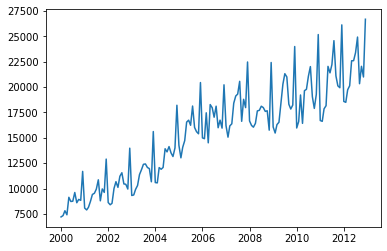

In [3]:
plt.plot(ts)

# The time series has a distinct seasonal pattern and is generally on the rise.


In [4]:
ts

,V1
2000-01-01,7204.0
2000-02-01,7335.0
2000-03-01,7812.0
2000-04-01,7413.0
2000-05-01,9136.0
2000-06-01,8725.0
2000-07-01,8751.0
2000-08-01,9609.0
2000-09-01,8601.0
2000-10-01,8930.0


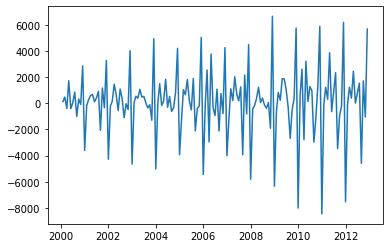

In [5]:
#First-order difference, meeting the requirements of stationarity
ts_diff = ts.diff(1)
plt. plot(ts_diff)
ts_diff.dropna(inplace=True)

# Data resampling

###  Begin with simple resampling techniques. Resampling involves changing the frequency of the time series observations. We’ll use a four month summary. 

In [6]:
ts_4M = ts.resample('4M').sum()

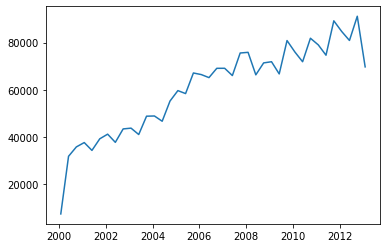

In [7]:
plt.plot(ts_4M)

# Sliding window

In [8]:
r = ts.rolling(window = 4)
rolling = print(r.mean())

                  V1
2000-01-01       NaN
2000-02-01       NaN
2000-03-01       NaN
2000-04-01   7441.00
2000-05-01   7924.00
2000-06-01   8271.50
2000-07-01   8506.25
2000-08-01   9055.25
2000-09-01   8921.50
2000-10-01   8972.75
2000-11-01   8993.75
2000-12-01   9513.50
2001-01-01   9382.75
2001-02-01   9123.25
2001-03-01   8952.25
2001-04-01   8214.75
2001-05-01   8549.25
2001-06-01   8959.50
2001-07-01   9407.50
2001-08-01   9937.75
2001-09-01   9781.00
2001-10-01   9887.75
2001-11-01   9806.75
2001-12-01  10317.00
2002-01-01  10274.75
2002-02-01   9885.00
2002-03-01   9616.75
2002-04-01   8892.75
2002-05-01   9406.50
2002-06-01   9835.00
...              ...
2010-07-01  19220.50
2010-08-01  20618.50
2010-09-01  20468.75
2010-10-01  19998.75
2010-11-01  19554.75
2010-12-01  20343.75
2011-01-01  19758.75
2011-02-01  19440.25
2011-03-01  19084.00
2011-04-01  17332.25
2011-05-01  18665.50
2011-06-01  19859.50
2011-07-01  20951.00
2011-08-01  22552.25
2011-09-01  22318.00
2011-10-01  2

<Figure size 1080x360 with 0 Axes>

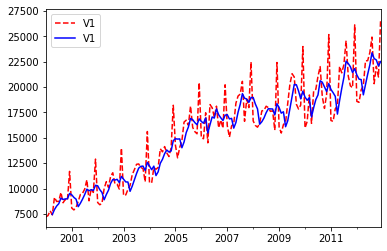

In [9]:
plt.figure(figsize=(15,5))
import matplotlib.lines as mlines

ax = ts.plot(style = 'r--',legend='ts')
ts.rolling(window= 4).mean().plot(style='b',legend='ts_rolling window = 4', ax = ax)
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller 
test = adfuller(ts_diff.V1.dropna(), autolag='AIC')
pvalue = test[1]
print(pvalue)     #not yet stationary

0.03815703587781203


When the p-value is less than 10−3. The null hypothesis (a unit root is present) is rejected with strong confidence. The time series is then stationary.So it's not stationary yet

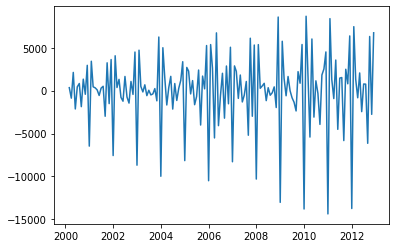

In [11]:
ts_diff2 = ts_diff.diff(1)
plt. plot(ts_diff2)
ts_diff2.dropna(inplace=True)

In [12]:
from statsmodels.tsa.stattools import adfuller 
test = adfuller(ts_diff2.V1.dropna(), autolag='AIC')
pvalue = test[1]
print(pvalue)

1.053665786180116e-23


The p-value is less than 10−3,It's stationary now.

# Seasonal inspection

### Image interpretation: The first grid in the above image is the image of the original data. The second grid image is the trend image of the data, and the obvious upward trend can be seen. The third grid is a seasonal trend. The last grid is the part of the residual, and it can be seen that the residual is also a sign of white noise.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

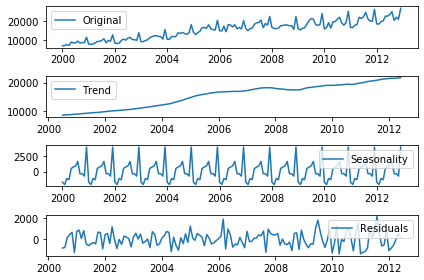

In [14]:
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

After these images,wo could draw the conclusion that the data is seasonable

# AR, MA, ARIMA model identification

### From the output results of AIC, BIC, and HQIC above, we can roughly try several models such as AR(2), MA(1) and ARIMA(2,2,4).

### When we decide to use the AR or MA model, we can use ACF and PACF to judge the value of the parameter.

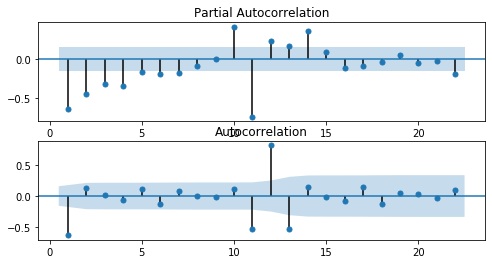

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
fig,ax = plt.subplots(2,figsize = (8,4))
plot_pacf(ts_diff2.dropna(),zero = False,ax = ax[0]) #AR(p)
plot_acf(ts_diff2.dropna(),zero = False,ax = ax[1])   #MA(q)
plt.show()

In [16]:
import itertools
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima_model import ARIMA
# Define the p, d and q parameters to take any value between 0 and 5
p =  d =  q = range(0, 6)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print('p,d,q',pdq,'\n')
for param in pdq:
    try:
        model = ARIMA(ts,order=param,freq=ts.index.inferred_freq)
        #model=ARIMA(ts_log,order=(2,1,2))
        result_ARIMA=model.fit(disp=-1)
        print('ARIMA{}-- AIC:{} -- BIC:{} --HQIC:{}'.format(
                param,result_ARIMA.aic,result_ARIMA.bic,result_ARIMA.hqic))
        
    except:
        continue

p,d,q [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 0), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2,

ARIMA(4, 2, 2)-- AIC:2791.3254852990176 -- BIC:2815.6211061183267 --HQIC:2801.1943054083795
ARIMA(4, 2, 3)-- AIC:2817.136543564124 -- BIC:2844.469116985847 --HQIC:2828.238966187156
ARIMA(4, 2, 4)-- AIC:2774.054391149071 -- BIC:2804.423917173207 --HQIC:2786.390416285773
ARIMA(4, 2, 5)-- AIC:nan -- BIC:nan --HQIC:nan
ARIMA(5, 0, 0)-- AIC:2835.8219552219293 -- BIC:2857.170947272676 --HQIC:2844.4929914344366
ARIMA(5, 0, 1)-- AIC:2836.1989086350504 -- BIC:2860.597756693047 --HQIC:2846.1086643064878
ARIMA(5, 0, 2)-- AIC:2837.176064284302 -- BIC:2864.6247683495476 --HQIC:2848.324539414669
ARIMA(5, 0, 3)-- AIC:nan -- BIC:nan --HQIC:nan
ARIMA(5, 0, 4)-- AIC:2825.7450972813203 -- BIC:2859.2935133610654 --HQIC:2839.3710113295465
ARIMA(5, 0, 5)-- AIC:nan -- BIC:nan --HQIC:nan
ARIMA(5, 1, 0)-- AIC:2810.344533115219 -- BIC:2831.6485089336534 --HQIC:2818.997729246647
ARIMA(5, 1, 1)-- AIC:2798.0857035360123 -- BIC:2822.4331044713663 --HQIC:2807.9750705433585
ARIMA(5, 1, 2)-- AIC:2799.615232557304 -- B

In [17]:
# ARIMA(2, 2, 4)-- AIC:2773.8542986625444

### Graphical analysis
### Comparing AR(2), MA(1) and ARIMA(2,0,4) model output results RSS, AR(2) RSS value is the smallest

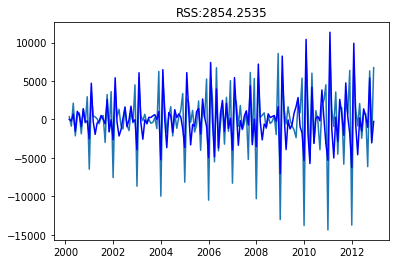

In [18]:
#AR model
model=ARIMA(ts_diff2,order=(2,0,0),freq=ts_diff2.index.inferred_freq)
result_AR=model.fit(disp=-1)
plt.plot(ts_diff2)
plt.plot(result_AR.fittedvalues,color='blue')
plt.title('RSS:%.4f'%sum(result_AR.fittedvalues-ts_diff2['V1'])**2)
plt.show()

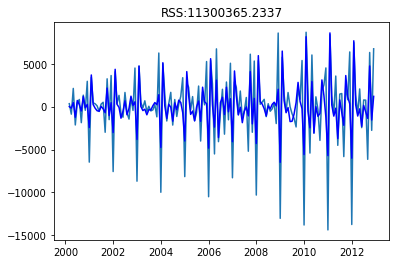

In [19]:
#MA model
model=ARIMA(ts_diff2,order=(0,0,1),freq=ts_diff2.index.inferred_freq)
result_MA=model.fit(disp=-1)
plt.plot(ts_diff2)
plt.plot(result_MA.fittedvalues,color='blue')
plt.title('RSS:%.4f'%sum(result_MA.fittedvalues-ts_diff2['V1'])**2)
plt.show()

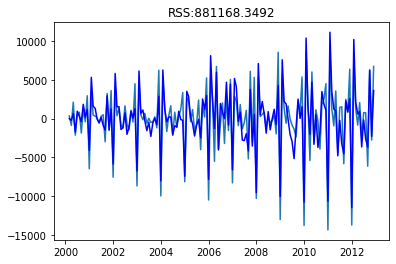

In [20]:
#ARMA
model=ARIMA(ts_diff2,order=(2,0,4),freq=ts_diff2.index.inferred_freq)
result_ARIMA_diff=model.fit(disp=-1)
plt.plot(ts_diff2)
plt.plot(result_ARIMA_diff.fittedvalues,color='blue')
plt.title('RSS:%.4f'%sum(result_ARIMA_diff.fittedvalues-ts_diff2['V1'])**2)
plt.show()

## After these images of three different methods,they are not the best solution.

## We can find that the methon SARIMAX is suitable for the data with Season-related data

# SARIMAX

### We will use "grid search" to iteratively explore different combinations of parameters

In [21]:
p=d=q=range(0,5)
print("p=",p,"d=",d,"q=",q)
pdq=list(itertools.product(p,d,q))
print("pdq:\n",pdq)
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]
print('SQRIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))

p= range(0, 5) d= range(0, 5) q= range(0, 5)
pdq:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3

#### The following code block iterates through a combination of parameters and uses the SARIMAX function to accommodate the corresponding seasonal ARIMA model. Here, the order parameter specifies the (p, d, q) parameter, and the seasonal_order parameter specifies the (P, D, Q, S) seasonal component of the seasonal ARIMA model. 

In [ ]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

### We choose the order(2,0,4)*(0,1,1,12)

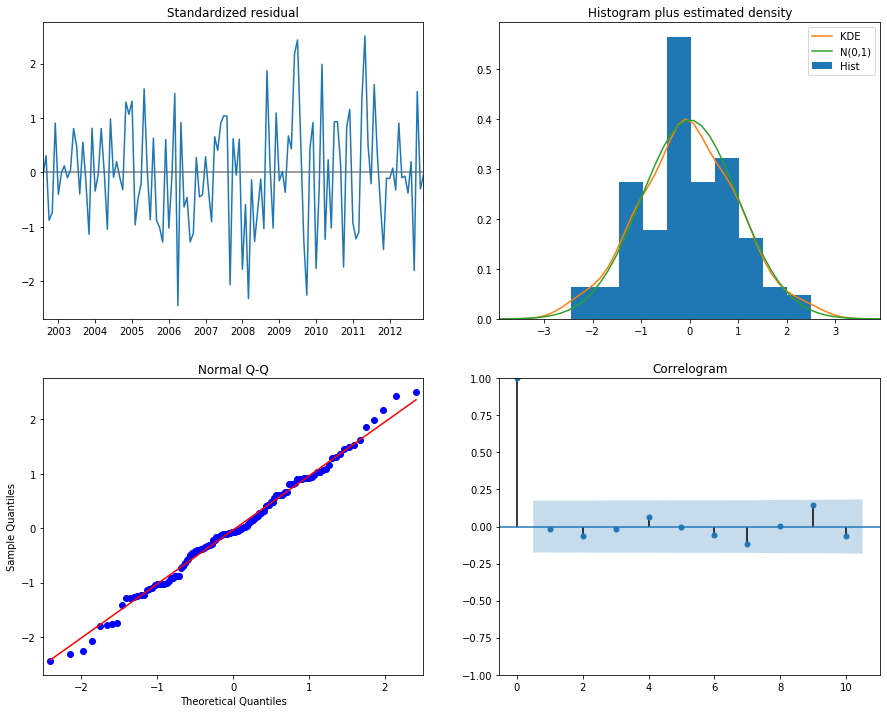

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as sarimax
mod = sarimax(ts_diff2,order=(2, 0, 4), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
 
model_fit = mod.fit()
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

### Looking at the histogram of residuals and a normal Q-Q-plot, we see that the residuals seem to be normally distributed. Plus,the correlogram shows that they are not correlated.¶

In [120]:
ts_train = ts[:"2010-08-01"]
ts_test = ts["2010-08-01":]

model_test = sarimax(ts, order=(2, 0, 4),
                            seasonal_order=(0, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
model_test_res = model_test.filter(results.params)
pred = model_test_res.get_prediction(start="2010-08-01")
pred_ci = pred.conf_int()

IndexError: index 6 is out of bounds for axis 0 with size 3

### Plot the observed test time series along with one step ahead predictions taken from model_test_res.

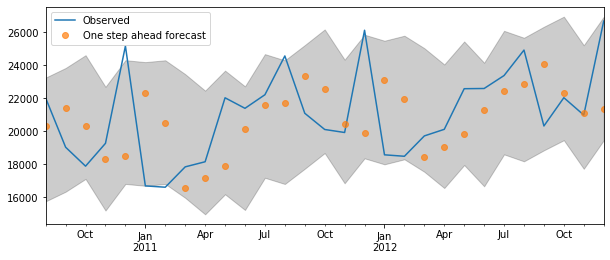

In [121]:
ax = ts_test.plot(y="V1", label="Observed", figsize=(10, 4))
pred.predicted_mean.plot(ax=ax, label="One step ahead forecast", alpha=0.7, linestyle='',marker='o')
ax.fill_between(pred_ci.index, pred_ci['lower V1'], pred_ci['upper V1'], color="k",alpha=0.2)
plt.legend()

## The point is basically online, the trend is the same, indicating that the forecast result is ok

In [136]:
mse = np.mean((pred.predicted_mean - ts_test.V1)**2)

In [137]:
mse

6221999.644996308

### the value of data is too big,it causes the value of mes is big.

In [138]:
model = sarimax(ts_train, order=(2, 2, 4))
model_fit = model.fit()
model_test = sarimax(ts, order=(2, 2, 4))
model_test_res = model_test.filter(model_fit.params)
pred = model_test_res.get_prediction(start="2010-08-01")
mse = np.mean((pred.predicted_mean - ts_test.V1)**2)

In [139]:
mse

6221999.644996308

# Prediction

### Visual comparison of raw data with predicted results

## Forecasting data for future periods, here is a prediction  for next 6 months, and gives visual results:

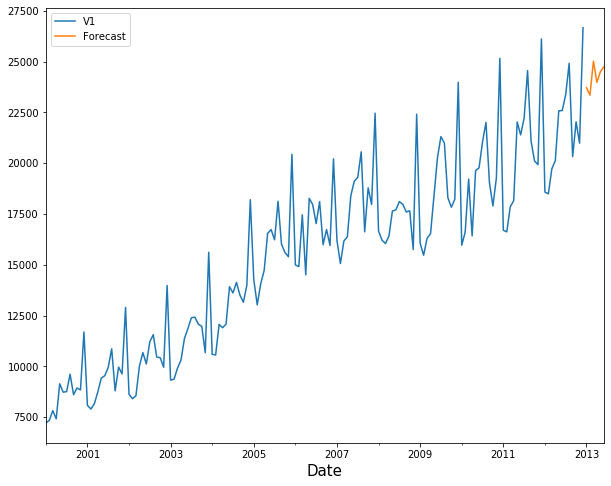

In [81]:
y_forecasted = pred.predicted_mean

pred_uc = model_test_res.get_forecast(steps=6 )#steps forcast 6 month

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(10, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',fontsize=15)

plt.legend()
plt.show()

## We can see that the forecast results basically match the line trend.So this method is good for this data.